<a href="https://colab.research.google.com/github/K-Viera/Python/blob/main/DesicionAnalysis/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#IMPORTAR LIBRERÍAS
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Extraccion datos


In [36]:
tickers = ['AAPL', 'GOOGL', 'META', 'BABA','F','DIS']
datos = pd.DataFrame()

for t in tickers:
    datos[t] = yf.download(t, start = '2019-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Rendimiento promedio anual

## Retorno Simple


In [37]:
serieRetornos = (datos/datos.shift(1))-1

retornoAPPL = serieRetornos['AAPL'].mean() * 250
print(f'El retorno de la acción de Apple es {round(retornoAPPL, 4) * 100}%')

retornoGOOGL = serieRetornos['GOOGL'].mean() * 250
print(f'El retorno de la acción de Google es {round(retornoGOOGL, 4) * 100}%')

retornoMETA = serieRetornos['META'].mean() * 250
print(f'El retorno de la acción de Meta es {round(retornoMETA, 4) * 100}%')

retornoBABA = serieRetornos['BABA'].mean() * 250
print(f'El retorno de la acción de Alibaba es {round(retornoBABA, 4) * 100}%')

retornoF = serieRetornos['F'].mean() * 250
print(f'El retorno de la acción de Ford es {round(retornoF, 4) * 100}%')

retornoDIS = serieRetornos['DIS'].mean() * 250
print(f'El retorno de la acción de Ford es {round(retornoDIS, 4) * 100}%')

El retorno de la acción de Apple es 46.32%
El retorno de la acción de Google es 27.139999999999997%
El retorno de la acción de Meta es 14.979999999999999%
El retorno de la acción de Alibaba es 2.48%
El retorno de la acción de Ford es 31.06%
El retorno de la acción de Ford es 5.89%


## Retorno logaritmico


In [38]:
retornoLogaritmico = np.log(datos/datos.shift(1))
retornoLogAPPL = retornoLogaritmico['AAPL'].mean() * 250
retornoLogGOOGL = retornoLogaritmico['GOOGL'].mean() * 250
retornoLogMETA = retornoLogaritmico['META'].mean() * 250
retornoLogBABA = retornoLogaritmico['BABA'].mean() * 250
retornoLogF = retornoLogaritmico['F'].mean() * 250
retornoLogDIS = retornoLogaritmico['DIS'].mean() * 250

# Portafolios


In [39]:
pesoEscenario1 = np.array([0.2 , 0.2 , 0.1 , 0.1 , 0.2, 0.2 ])
pesoEscenario2 = np.array([0   , 0.5 , 0.05, 0.3 , 0  , 0.15])
pesoEscenario3 = np.array([0.3 , 0.6 , 0   , 0.1 , 0  , 0   ])
pesoEscenario4 = np.array([0.15, 0.15, 0.15, 0.15,0.2 , 0.2 ])
pesoEscenario5 = np.array([0.5 , 0   , 0   , 0   ,0.5 , 0   ])

## Retorno anual promedio

In [40]:
retornoPortafolio1 = np.dot((serieRetornos.mean()*250), pesoEscenario1)
print(f'El retorno del portafolio 1 es {round(retornoPortafolio1, 4) * 100}%')

retornoPortafolio2 = np.dot((serieRetornos.mean()*250), pesoEscenario2)
print(f'El retorno del portafolio 2 es {round(retornoPortafolio2, 4) * 100}%')

retornoPortafolio3 = np.dot((serieRetornos.mean()*250), pesoEscenario3)
print(f'El retorno del portafolio 3 es {round(retornoPortafolio3, 4) * 100}%')

retornoPortafolio4 = np.dot((serieRetornos.mean()*250), pesoEscenario4)
print(f'El retorno del portafolio 4 es {round(retornoPortafolio4, 4) * 100}%')

retornoPortafolio5 = np.dot((serieRetornos.mean()*250), pesoEscenario5)
print(f'El retorno del portafolio 5 es {round(retornoPortafolio5, 4) * 100}%')

print('El mejor retorno posible es el del portafolio 3')

El retorno del portafolio 1 es 23.830000000000002%
El retorno del portafolio 2 es 15.950000000000001%
El retorno del portafolio 3 es 30.43%
El retorno del portafolio 4 es 21.029999999999998%
El retorno del portafolio 5 es 38.690000000000005%
El mejor retorno posible es el del portafolio 3


## Riesgo Portafolio

### Matrices


In [41]:
matrizCovarianza = retornoLogaritmico.cov()
matrizCovarianzaAnual = matrizCovarianza * 250
matrizCorrelacion = retornoLogaritmico.corr()

### Calculo Riesgo

In [42]:
varianzaPortafolio1=np.dot(pesoEscenario1.T, np.dot(matrizCovarianzaAnual, pesoEscenario1))
volatilidadPortafolio1 = np.sqrt(varianzaPortafolio1)

varianzaPortafolio2=np.dot(pesoEscenario2.T, np.dot(matrizCovarianzaAnual, pesoEscenario2))
volatilidadPortafolio2 = np.sqrt(varianzaPortafolio2)

varianzaPortafolio3 = np.dot(pesoEscenario3.T, np.dot(matrizCovarianzaAnual, pesoEscenario3))
volatilidadPortafolio3 = np.sqrt(varianzaPortafolio3)

varianzaPortafolio4 = np.dot(pesoEscenario4.T, np.dot(matrizCovarianzaAnual, pesoEscenario4))
volatilidadPortafolio4 = np.sqrt(varianzaPortafolio4)

varianzaPortafolio5=np.dot(pesoEscenario5.T, np.dot(matrizCovarianzaAnual, pesoEscenario5))
volatilidadPortafolio5 = np.sqrt(varianzaPortafolio5)

In [43]:
print('Volatilidad escenario1',volatilidadPortafolio1)
print('Volatilidad escenario2',volatilidadPortafolio2)
print('Volatilidad escenario3',volatilidadPortafolio3)
print('Volatilidad escenario4',volatilidadPortafolio4)
print('Volatilidad escenario5',volatilidadPortafolio5)

Volatilidad escenario1 0.2806871507958313
Volatilidad escenario2 0.2946472351556952
Volatilidad escenario3 0.29321836899904563
Volatilidad escenario4 0.2851892621149267
Volatilidad escenario5 0.3302651259627826


### Retorno por accion

In [44]:
sha1 = (retornoPortafolio1 - 0.1)/ math.sqrt(varianzaPortafolio1)
sha2 = (retornoPortafolio2 - 0.1)/ math.sqrt(varianzaPortafolio2)
sha3 = (retornoPortafolio3 - 0.1)/ math.sqrt(varianzaPortafolio3)
sha4 = (retornoPortafolio4 - 0.1)/ math.sqrt(varianzaPortafolio4)
sha5 = (retornoPortafolio5 - 0.1)/ math.sqrt(varianzaPortafolio5)

In [46]:
print('Retorto por accion escenario1',sha1)
print('Retorto por accion escenario2',sha2)
print('Retorto por accion escenario3',sha3)
print('Retorto por accion escenario4',sha4)
print('Retorto por accion escenario5',sha5)
print('La mejor opcion es el portafolio numero 5')

Retorto por accion escenario1 0.49268414119430926
Retorto por accion escenario2 0.2017843300698299
Retorto por accion escenario3 0.6966263031052216
Retorto por accion escenario4 0.3867324691956851
Retorto por accion escenario5 0.8687715456583222
La mejor opcion es el portafolio numero 5


#Simulacion montecarlo para volatilidad

In [47]:
ticker1 = 'AAPL'
data1 = pd.DataFrame()
data1 [ticker1] = yf.download(ticker1, start = '2019-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


<Figure size 1152x576 with 0 Axes>

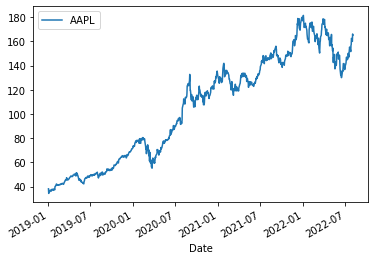

In [48]:
plt.figure(figsize = (16,8))
data1.plot()
plt.show()

In [49]:
ticker2 = 'GOOGL'
data2 = pd.DataFrame()
data2 [ticker2] = yf.download(ticker2, start = '2019-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


<Figure size 1152x576 with 0 Axes>

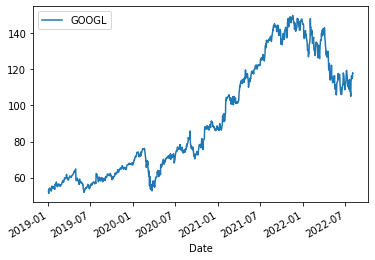

In [50]:
plt.figure(figsize = (16,8))
data2.plot()
plt.show()

In [51]:
ticker3 = 'META'
data3 = pd.DataFrame()
data3 [ticker3] = yf.download(ticker3, start = '2019-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


##Rendimiento

In [52]:
rendimientoLogaritmico1 = np.log(1+ data1.pct_change())
u1 = rendimientoLogaritmico1.mean()
var1 = rendimientoLogaritmico1.var()


rendimientoLogaritmico2 = np.log(1+ data2.pct_change()) #shift-1 + la división
u2 = rendimientoLogaritmico2.mean()

var2 = rendimientoLogaritmico2.var()

rendimientoLogaritmico3 = np.log(1+ data3.pct_change()) #shift-1 + la división
u3 = rendimientoLogaritmico3.mean()
var3 = rendimientoLogaritmico3.var()




,AAPL
Date,
2019-01-02,NaN
2019-01-03,-0.104925
2019-01-04,0.041803
2019-01-07,-0.002228
2019-01-08,0.018884
